In [408]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dummy-advertising-and-sales-data/Dummy Data HSS.csv


In [409]:
v = pd.read_csv("/kaggle/input/dummy-advertising-and-sales-data/Dummy Data HSS.csv")

In [410]:
v.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TV,Radio,Social Media,Influencer,Sales
2038,64.0,25.827050,5.193277,Macro,230.250803
4005,18.0,11.605782,1.587599,Micro,63.090859
159,21.0,1.397371,1.444591,Nano,77.547948
922,59.0,18.590667,1.662434,Micro,207.718100
184,25.0,0.413849,NaN,Macro,92.357092


In [411]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [412]:
v.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [413]:
v["Influencer"].value_counts()

Influencer
Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: count, dtype: int64

In [414]:
# now we are going to impute TV ,  Radio , Social media,
#  and sales  missing values  by 

In [415]:
columns_to_impute = ['TV', 'Radio', 'Social Media' ,"Sales"]  # jo columns fill karne hain

for col in columns_to_impute:
    num_missing = v[col].isnull().sum()                     # missing count
    random_values = v[col].dropna().sample(num_missing, replace=True).values  # random sample
    missing_indexes = v[v[col].isnull()].index             # missing indexes
    v.loc[missing_indexes, col] = random_values           # fill missing values


In [416]:
v.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [417]:
v.shape

(4572, 5)

In [418]:
v.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.054462,18.166522,3.323595,192.443170
std,26.121535,9.675060,2.212523,93.111085
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.546519,1.528262,112.337832
50%,53.000000,17.875181,3.055345,188.963678
75%,77.000000,25.649730,4.807356,272.450197
max,100.000000,48.871161,13.981662,364.079751


In [419]:
v

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [420]:
v.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [421]:
import seaborn as sns
import matplotlib.pyplot as plt

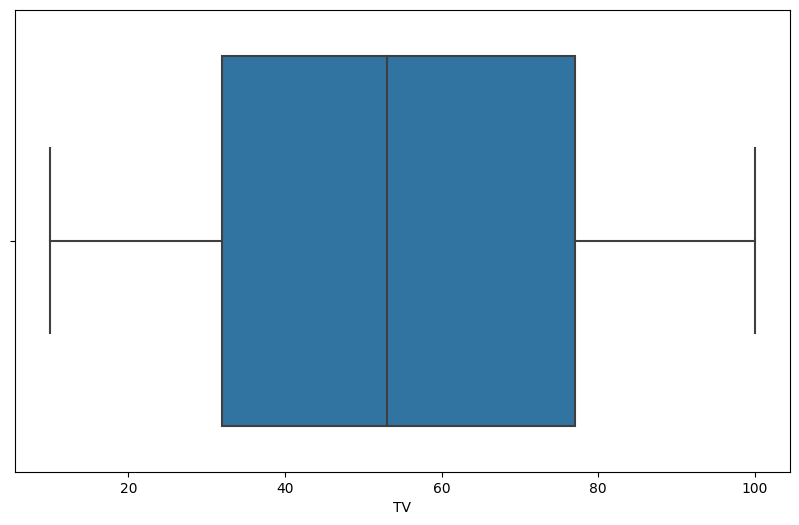

In [422]:
plt.figure(figsize=(10,6))
sns.boxplot( x =v['TV'])
plt.show()

# here at the side of whiskers 
# we could see that there is no 
#  dotted pointers are there ....

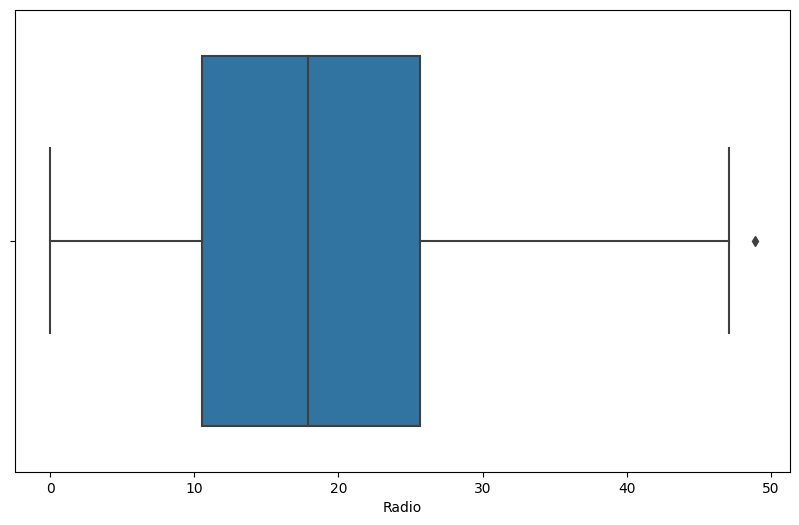

In [423]:

plt.figure(figsize = (10 ,6))
sns.boxplot(x = v["Radio"])
plt.show()

# here at the right side we could see
# that there is very  little outliers 
# are presecnts

Text(0.5, 1.0, 'Boxplot of  Sales')

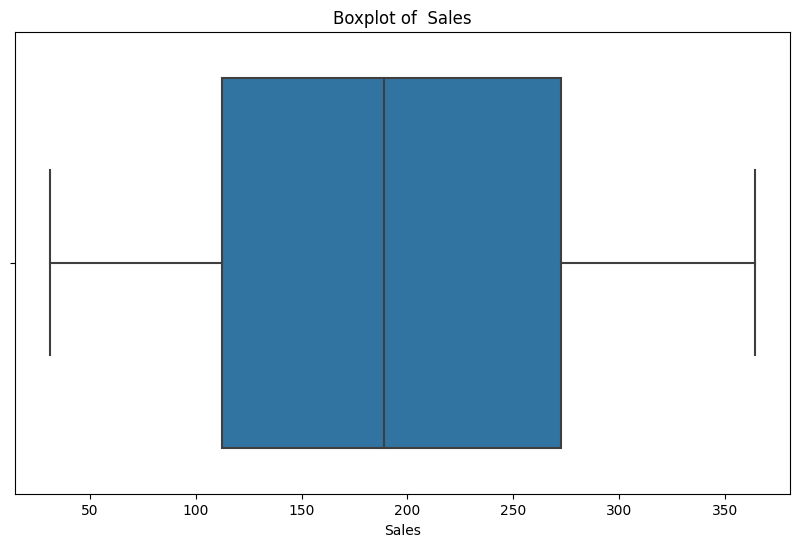

In [424]:
plt.figure(figsize=(10,6))
sns.boxplot(x=v['Sales'])
plt.title('Boxplot of  Sales')
# in sales  there is no outliers 
# are  presents 

Text(0.5, 1.0, 'Boxplot of SocialMedia')

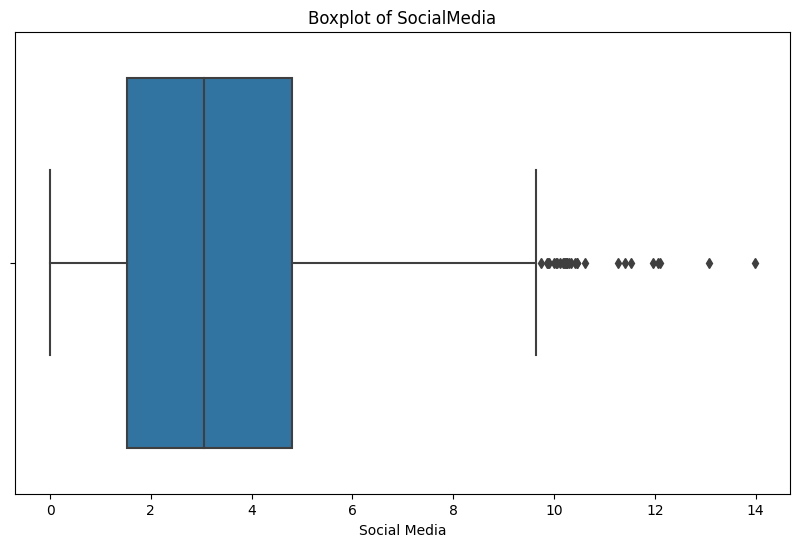

In [425]:
plt.figure(figsize=(10,6))
sns.boxplot(x=v["Social Media"])


plt.title('Boxplot of SocialMedia')
# quite much outliers are presents here 
# Exreme values are quite much i our datset 

In [426]:
# lets try  to to find the outliers values 


In [427]:

col = 'Social Media'

# by here we finds out the  q1 and q3
Q1 = v[col].quantile(0.25)
Q3 = v[col].quantile(0.75)

# calculaig the IQR 
IQR = Q3 - Q1

# O lower aur upper bounds of outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  can see Outliers by using this code
outliers = v[(v[col] < lower_bound) | (v[col] > upper_bound)]
print("Outliers in column", col, ":\n", outliers[col].values)


Outliers in column Social Media :
 [ 9.9974722   9.90428608 10.45392075 11.40362504 10.17498349 10.26055357
 13.08395694 10.42085288  9.88317636 11.26042983 10.2437346  10.0637457
 10.26018838 10.33797765 12.10801729 11.53462604 11.96433309 13.98166208
 10.61089545 10.0302438  10.21480685  9.85509108 12.05474882  9.75164701
 10.18875485 10.29764311 10.45510884 10.12766664]


In [428]:
# lets make duplicate datasets where 
# outliers operation could be operate 


In [429]:
v_copy = v.copy()

In [430]:
v_copy

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [431]:
# lets drop influencers column from our
# copy dataset ....
v_copy = v_copy.drop('Influencer', axis=1)

In [432]:
v_copy

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [433]:
# we know there are  quite much ouliers 
# are presents in social media ...

# now what we do is to use capping 
# means fill the values by upper bond 

In [434]:

col = 'Social Media'

# Q1 aur Q3
Q1 = v_copy[col].quantile(0.25)
Q3 = v_copy[col].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping
v_copy[col] = v_copy[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Check
print(v_copy[col].describe())


count    4572.000000
mean        3.317341
std         2.191395
min         0.000031
25%         1.528262
50%         3.055345
75%         4.807356
max         9.725997
Name: Social Media, dtype: float64


In [435]:
v_copy

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


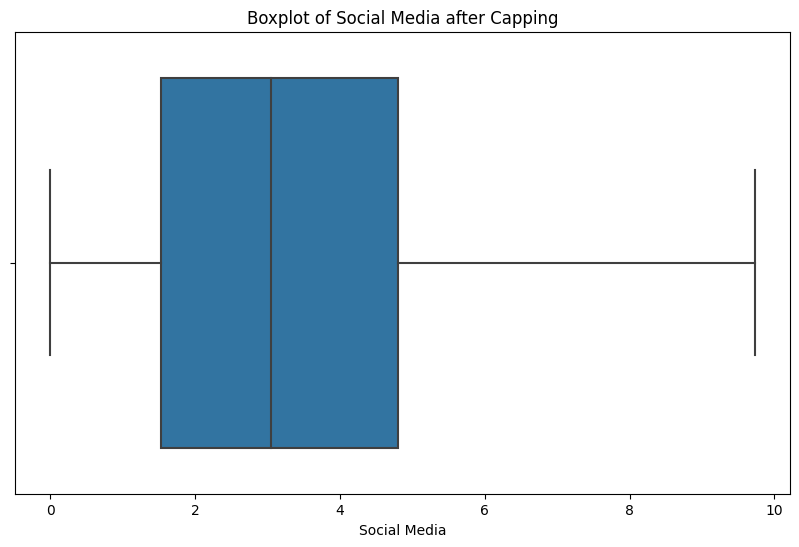

In [436]:
plt.figure(figsize=(10,6))
sns.boxplot(x=v_copy['Social Media'])
plt.title('Boxplot of Social Media after Capping')
plt.show()
# now we could see that there is no 
# outliers are presents in social media 
#  section 

In [437]:
# lets separate  inputs and outputs column 
x = v_copy.iloc[: ,0:3]
y = v_copy.iloc[: , -1]

In [438]:
x

,TV,Radio,Social Media
0,16.0,6.566231,2.907983
1,13.0,9.237765,2.409567
2,41.0,15.886446,2.913410
3,83.0,30.020028,6.922304
4,15.0,8.437408,1.405998
...,...,...,...
4567,26.0,4.472360,0.717090
4568,71.0,20.610685,6.545573
4569,44.0,19.800072,5.096192
4570,71.0,17.534640,1.940873


In [439]:
y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4572, dtype: float64

In [440]:
# lets do train test split 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2)

In [441]:
# now lets scale the train test values ...
# scaling is done because of to refrain 
# from the dominant values....

In [442]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [443]:
x_train = scaler.fit_transform(x_train)
x_test =  scaler.transform(x_test)

In [444]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [445]:
clf = LinearRegression()
# model training

y_pred = clf.fit(x_train , y_train)

In [446]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict karo
y_pred = clf.predict(x_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 154.1609104092256
R² Score: 0.9822808656055727


In [447]:
!pip install statsmodels


In [448]:
import statsmodels.api as sm

# maan lo X_train (features) aur y_train (target) hai
# Step 1: Constant add karna (intercept ke liye)
x_train_const = sm.add_constant(x_train)

# Step 2: OLS model fit karna
model = sm.OLS(y_train, x_train_const).fit()

# Step 3: Summary dekhna
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.849e+05
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        10:28:59   Log-Likelihood:                -12570.
No. Observations:                3657   AIC:                         2.515e+04
Df Residuals:                    3653   BIC:                         2.517e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        193.0400      0.125   1550.192      0.0

**lets try by random forest technique**

In [449]:
v_copy2 = v.copy()

In [450]:
v_copy2

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [451]:
v_copy2.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [452]:
v_copy2 = v_copy2.drop( "Influencer" , axis = 1)

In [453]:
v_copy2

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [454]:
from sklearn.ensemble import RandomForestRegressor

In [455]:
a = v_copy2.iloc[: ,0:3]
b = v_copy2.iloc[: , -1]

In [456]:
# lets do train test split 
from sklearn.model_selection import train_test_split
a_train , a_test , b_train , b_test = train_test_split(a,b,test_size = 0.2)

In [457]:
# before fitting and making my model 
# by the use of random ensemble we will 
# find  the n_estimator by the use of 
# random search grid search tv 
# of decision tree 
# means  how many decision tree we should
# use for the best results 


In [458]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50, 100, 200, 500]}

grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid.fit(a_train, b_train)

print("Best n_estimators:", grid.best_params_)
print("Best R2 score:", grid.best_score_)


Best n_estimators: {'n_estimators': 500}
Best R2 score: 0.9890691376025295


In [459]:
# here we can see by the use of 
# 50 estimator of decison tree our 
# model will perform best 

In [460]:
# lets train and fit our model by the use of 
# random forest 

In [461]:
rf = RandomForestRegressor(n_estimators = 50 , random_state = 42)

In [462]:
rf.fit(a_train , b_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [463]:
# lets do the prediction 
b_pred = rf.predict(a_test)



In [464]:
# lets evaluate my model 
print("MSE:", mean_squared_error(b_test, b_pred))
print("R² score:", r2_score(b_test, b_pred))

MSE: 28.52698430784222
R² score: 0.9967469697274051


making model by Polynomial regression


<!-- lets fit my model by the use of 
polynomial regression 

but before fitting my model we  should make 
sure that  my datset ios really polynomial type 
or not means curve tyepe or not ...
so we should check by scattering plot
 -->



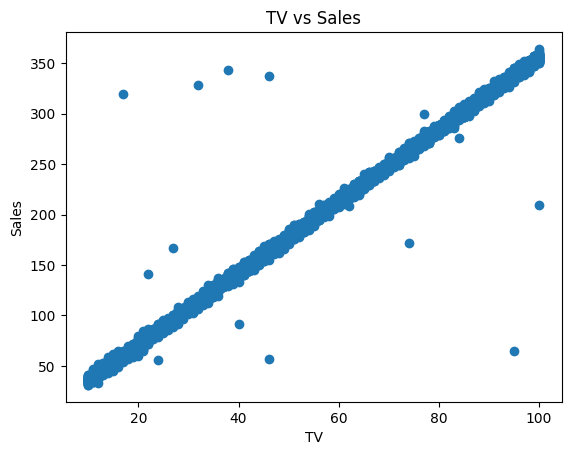

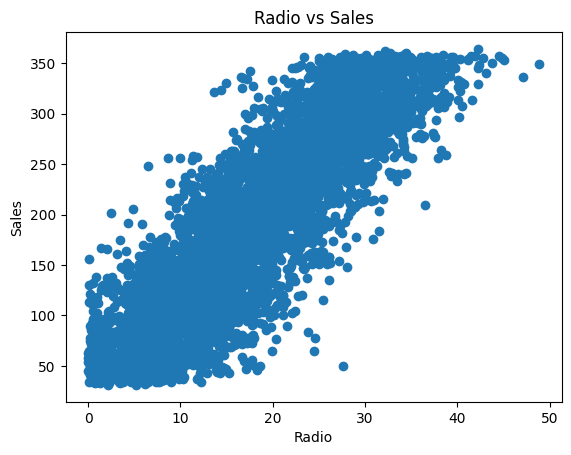

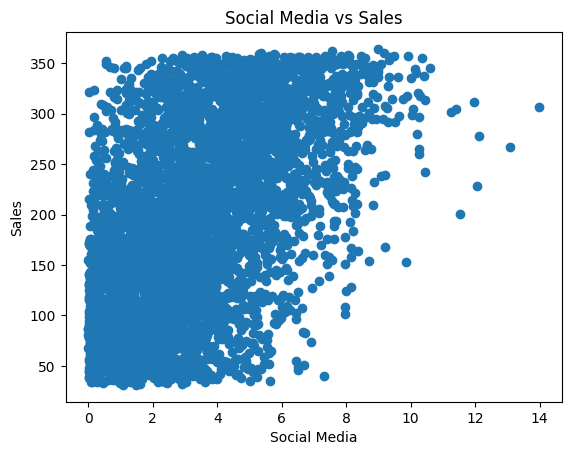

In [465]:
import matplotlib.pyplot as plt

features = ['TV', 'Radio', 'Social Media']

for col in features:
    plt.scatter(v_copy2[col], v_copy2['Sales'])
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title(f'{col} vs Sales')
    plt.show()


In [466]:
# here we can  see that my dataset  is not 
# type of polynoamial but still we  fit 
# our  dataset by the use of polynomial 
# too...just curious to know the mse and r2 score



In [467]:
v_copy3 = v.copy()

In [468]:
v_copy3
# lets drop influencer column 


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [469]:
v_copy3.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [470]:
#  lets separate x and y first
c = v_copy3.iloc[: ,0:3]
d = v_copy3.iloc[: , -1]

In [471]:
# lets do train test split
c_train , c_test , d_train , d_test = train_test_split(c,d,test_size = 0.2)

In [472]:
# lets scale  our inputs features
c_train_scaled = scaler.fit_transform(c_train)
c_test_scaled  = scaler.transform(c_test)

In [473]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)   # degree=2 means quadratic
c_train_poly = poly.fit_transform(c_train)
c_test_poly = poly.transform(c_test)


In [474]:
clf = LinearRegression()
clf.fit(c_train_poly, d_train)

# Step 5: Prediction
d_pred = clf.predict(c_test_poly)

# Step 6: Evaluation
print("R² Score:", r2_score(d_test, d_pred))
print("MSE:", mean_squared_error(d_test, d_pred))

R² Score: 0.9966871265947364
MSE: 28.756817147050246


**XGboost**

lets try  to train and fit our model 
by powerful technique xg boost 


In [475]:
# first we are here making a duplicate dataset 
v_copy4 = v.copy()

In [476]:
v_copy4

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [477]:
# lets separate our infuts and outputs  features
e = v_copy4.iloc[: , 0:3]
f = v_copy4.iloc[: , -1 ]

In [478]:
# lets do train test split 
e_train , e_test , f_train , f_test = train_test_split(x, y , test_size = 0.2 , random_state = 42 )

In [479]:
# lets before  fitting my model by the use of xgboost
# lets finds out the best  n_estimators ..
# how many decision would give the best results
# by the use of hyperparameter tunning grid search cv



In [480]:
from xgboost import XGBRegressor

In [481]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=3, scoring='r2')
grid.fit(e_train, f_train)

print("Best n_estimators:", grid.best_params_['n_estimators'])


Best n_estimators: 50


In [482]:
#  using sequencially 50 decision tree would be best
# lets fit our model 

In [483]:
xgb = XGBRegressor(
    objective='reg:squarederror',  # Regression for liye
    n_estimators= 50,               #  how many  trees
    max_depth=5,                    # Tree maximum depth
    learning_rate=0.1               # Step size
)


In [484]:
xgb.fit(e_train, f_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [485]:
f_pred = xgb.predict(e_test)


In [486]:
print("R² Score:", r2_score(f_test, f_pred))
print("MSE:", mean_squared_error(f_test, f_pred))
     

R² Score: 0.9937400444586233
MSE: 52.24895481932256
